# Surpise Housing Case Study

## **Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## **Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Importing and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
data.shape

(1460, 81)

## 2. Data Preprocessing

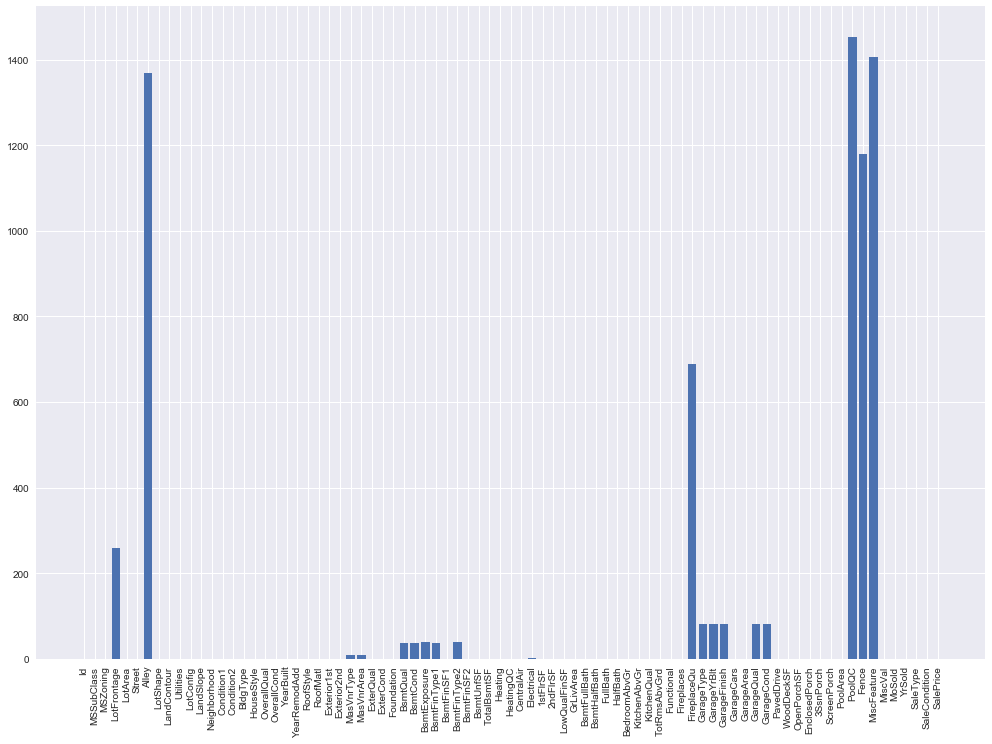

In [7]:
plt.figure(figsize=[17,12])
plt.bar(data.columns, data.isnull().sum())
plt.xticks(rotation=90)
plt.show()

### i) Dealing with missing values

In [8]:
round(data.isnull().sum()/data.shape[0]*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# Numerical columns imputed with median strategy
data['MasVnrArea'].fillna(data['MasVnrArea'].median() , inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

In [10]:
# Imputing categorical columns with values MNAR
data['Alley'].fillna('N/A', inplace=True)
data['FireplaceQu'].fillna('N/A', inplace=True)
data['PoolQC'].fillna('N/A', inplace=True)
data['Fence'].fillna('N/A', inplace=True)
data['MiscFeature'].fillna('N/A', inplace=True)
data['BsmtQual'].fillna('N/A', inplace=True)
data['BsmtCond'].fillna('N/A', inplace=True)
data['BsmtExposure'].fillna('N/A', inplace=True)
data['BsmtFinType1'].fillna('N/A', inplace=True)
data['BsmtFinType2'].fillna('N/A', inplace=True)
data['GarageType'].fillna('N/A', inplace=True)
data['GarageFinish'].fillna('N/A', inplace=True)
data['GarageQual'].fillna('N/A', inplace=True)
data['GarageCond'].fillna('N/A', inplace=True)
data['GarageYrBlt'].fillna(-1, inplace=True)

In [11]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [13]:
# Imputing Mode values for categorical columns
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [14]:
# Dropping lotfrontagecolumn as it contain high missing values which are MNAR
data.drop(columns=['Id', 'LotFrontage'], inplace=True)

### ii) Checking target variable

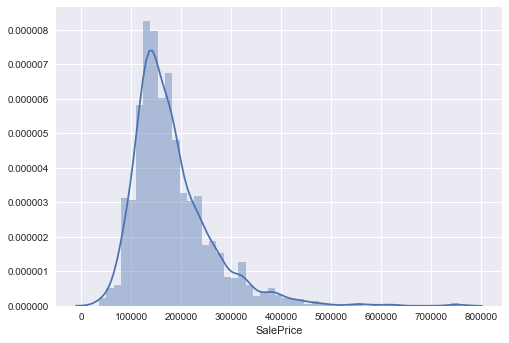

In [15]:
# Checking target variable

sns.distplot(data['SalePrice'])
plt.show()

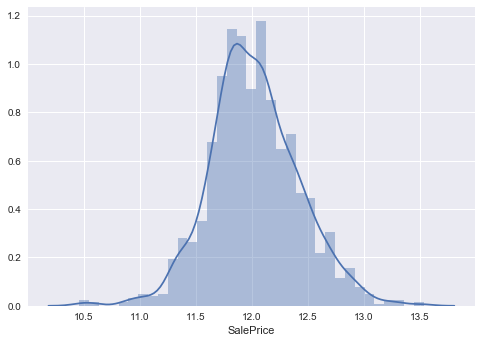

In [16]:
# transforming target variable with log scale
data['SalePrice'] = np.log(data['SalePrice'])
sns.distplot(data['SalePrice'])
plt.show()

In [17]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

### iii) Grouping columns with so many categories

In [18]:
numerical_columns = ['MSSubClass', 'LotArea', 'OverallQual', 
       'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','GarageYrBlt', 'MiscVal', 'MoSold', 'YrSold']

categorical_columns = ['MSZoning', 'Street','Alley', 'LotShape','HouseStyle', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType','SaleCondition']

In [19]:
for cols in categorical_columns:
    print(round(data[cols].value_counts(normalize=True)*100, 2))
    print()

RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

N/A     93.77
Grvl     3.42
Pave     2.81
Name: Alley, dtype: float64

Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4

In [20]:
# Merging categories values with similar titles

data['LotShape'].replace({"IR1":"IR"}, inplace=True)
data['LotShape'].replace({"IR2":"IR"}, inplace=True)
data['LotShape'].replace({"IR3":"IR"}, inplace=True)

data['LotConfig'].replace({"FR2":"FR"}, inplace=True)
data['LotConfig'].replace({"FR3":"FR"}, inplace=True)

data['Condition1'].replace({"RRAn":"RR"}, inplace=True)
data['Condition1'].replace({"RRAe":"RR"}, inplace=True)
data['Condition1'].replace({"RRNn":"RR"}, inplace=True)
data['Condition1'].replace({"RRNe":"RR"}, inplace=True)
data['Condition1'].replace({"PosA":"Pos"}, inplace=True)
data['Condition1'].replace({"PosN":"Pos"}, inplace=True)

data['Condition2'].replace({"RRAn":"RR"}, inplace=True)
data['Condition2'].replace({"RRAe":"RR"}, inplace=True)
data['Condition2'].replace({"RRNn":"RR"}, inplace=True)
data['Condition2'].replace({"PosA":"Pos"}, inplace=True)
data['Condition2'].replace({"PosN":"Pos"}, inplace=True)


data['HouseStyle'].replace({"1.5Fin":"1.5Story"},inplace=True)
data['HouseStyle'].replace({"1.5Unf":"1.5Story"},inplace=True)
data['HouseStyle'].replace({"2.5Unf":"2.5Story"},inplace=True)
data['HouseStyle'].replace({"2.5Fin":"2.5Story"},inplace=True)

In [21]:
## Grouping categories into others with less than 2%

columns = ['RoofMatl','Neighborhood','Heating','PoolQC','Functional','SaleType','Electrical','Exterior2nd','Exterior1st','GarageType','RoofStyle','Foundation','SaleCondition','MiscFeature']
for col in columns:
    cat = (round(data[col].value_counts(normalize=True)*100,1))

    categories = cat[cat < 2].index
    for cat in categories:
        data[col].replace({cat:"Other"},inplace=True)

### iv) Dealing with Year columns

In [22]:
data['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [23]:
# Making new 'Age' column from Year Built
from datetime import date

current_year = date.today().year
data['Age'] = data['YearBuilt'].apply(lambda x: current_year - x)

In [24]:
data.drop(columns=["YearBuilt", "GarageYrBlt", "YearRemodAdd", "YrSold"], inplace=True)

### v) Dropping highly skewed categorical columns

In [25]:
cols = ['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC']

for col in cols:
    print(round(data[col].value_counts(normalize=True)*100,1))

Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
AllPub    99.9
NoSeWa     0.1
Name: Utilities, dtype: float64
Norm      99.0
Feedr      0.4
RR         0.3
Pos        0.2
Artery     0.1
Name: Condition2, dtype: float64
CompShg    98.2
Other       1.8
Name: RoofMatl, dtype: float64
GasA     97.8
Other     2.2
Name: Heating, dtype: float64
N/A      99.5
Other     0.5
Name: PoolQC, dtype: float64


In [26]:
# Dropping highly Skewed categorical columns
data.drop(cols, axis=1, inplace=True)

## 3. Exploratory Data Analysis

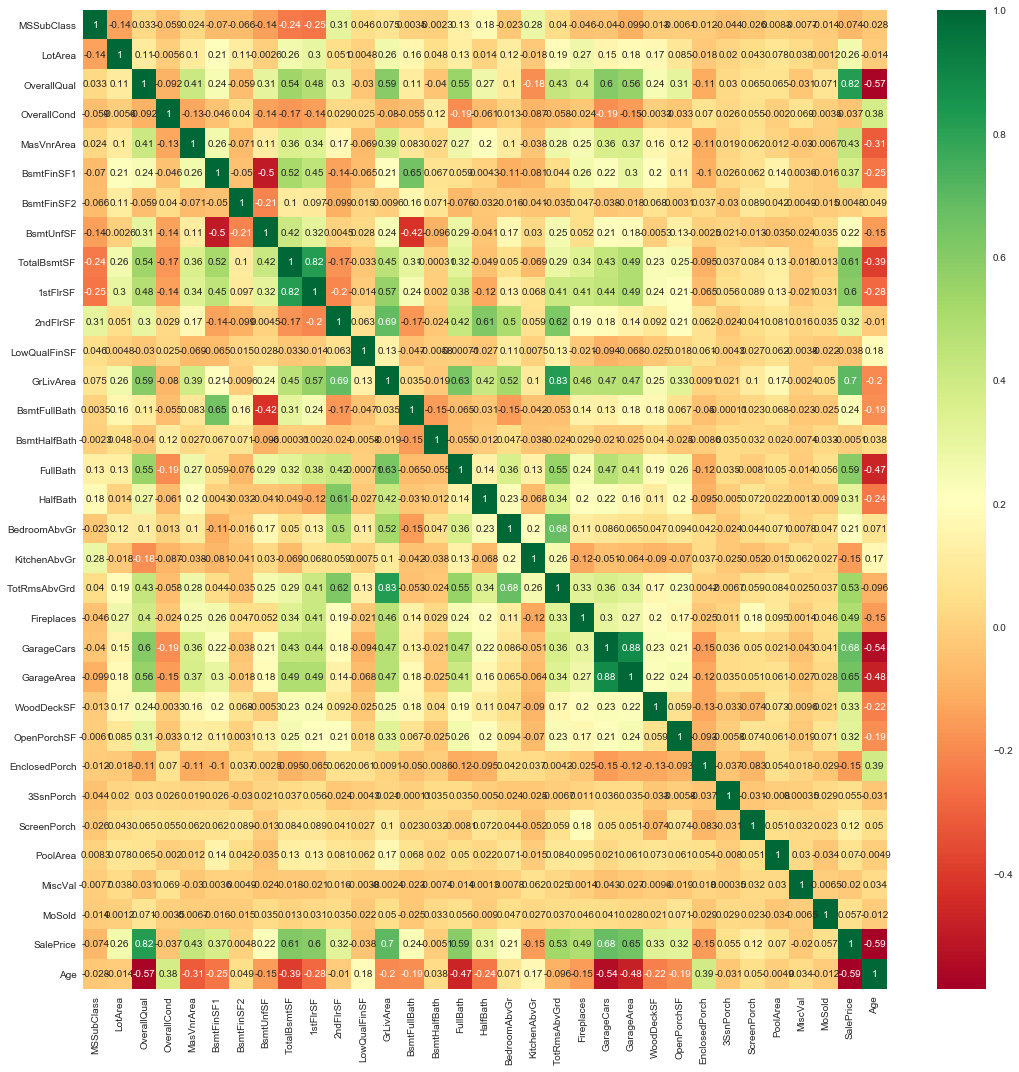

In [27]:
plt.figure(figsize=[18,18])
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [28]:
numerical_columns = ['MSSubClass', 'LotArea', 'OverallQual', 
       'OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age']

<Figure size 720x576 with 0 Axes>

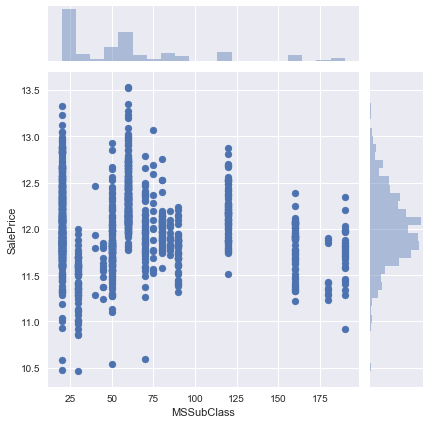

<Figure size 720x576 with 0 Axes>

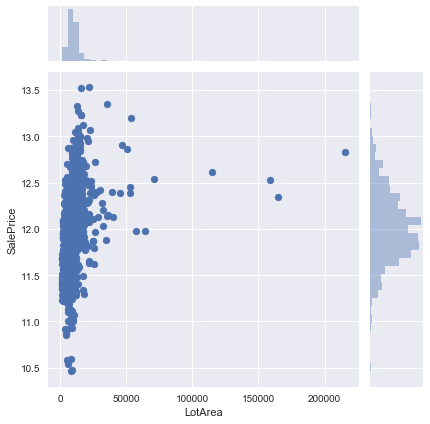

<Figure size 720x576 with 0 Axes>

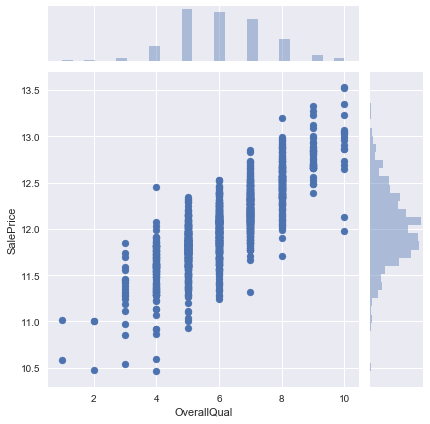

<Figure size 720x576 with 0 Axes>

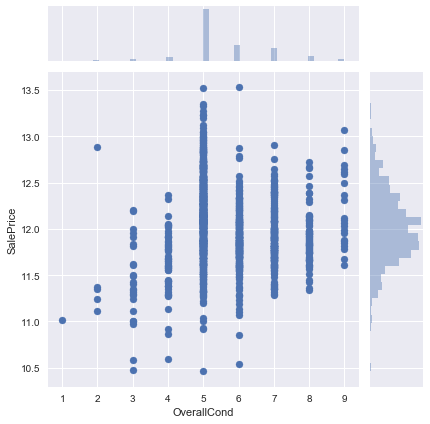

<Figure size 720x576 with 0 Axes>

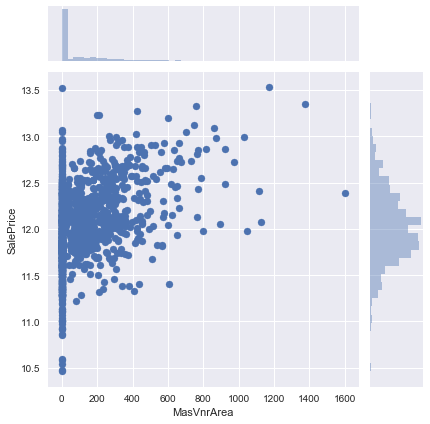

<Figure size 720x576 with 0 Axes>

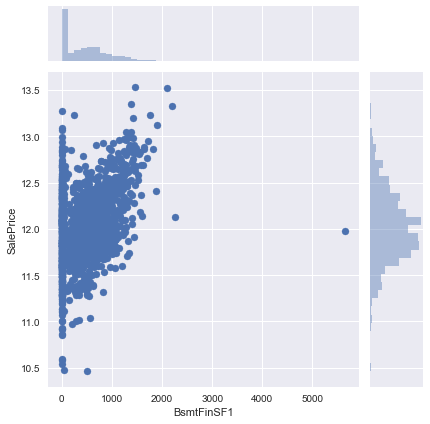

<Figure size 720x576 with 0 Axes>

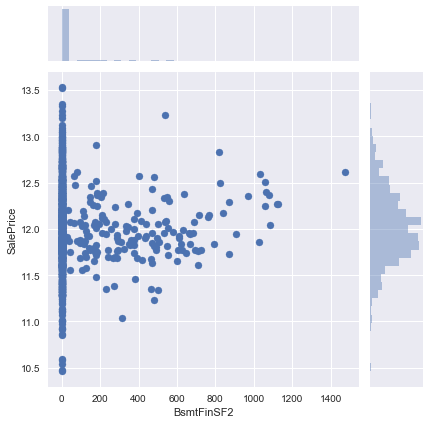

<Figure size 720x576 with 0 Axes>

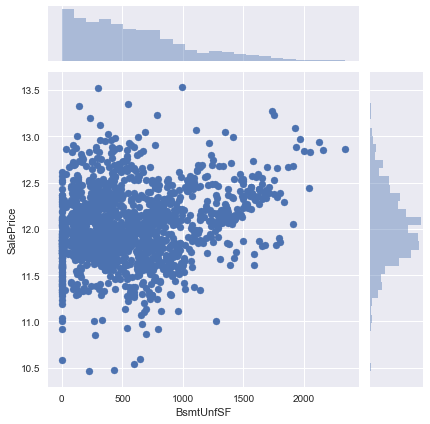

<Figure size 720x576 with 0 Axes>

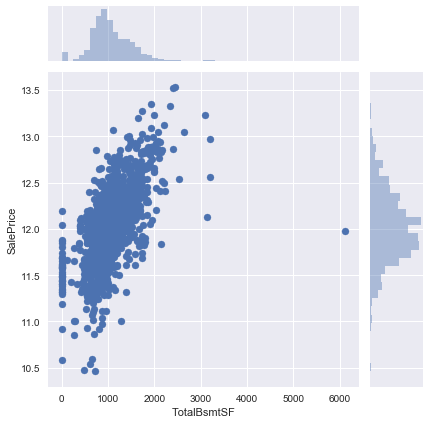

<Figure size 720x576 with 0 Axes>

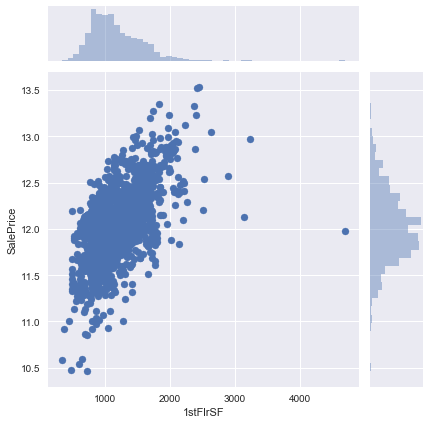

<Figure size 720x576 with 0 Axes>

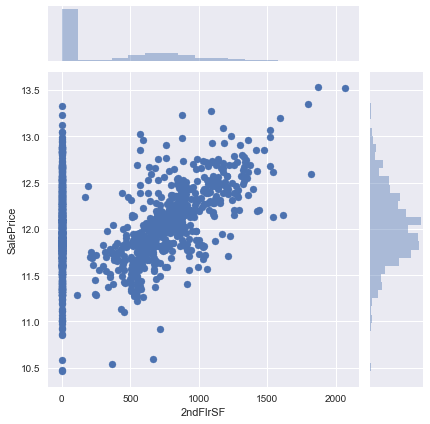

<Figure size 720x576 with 0 Axes>

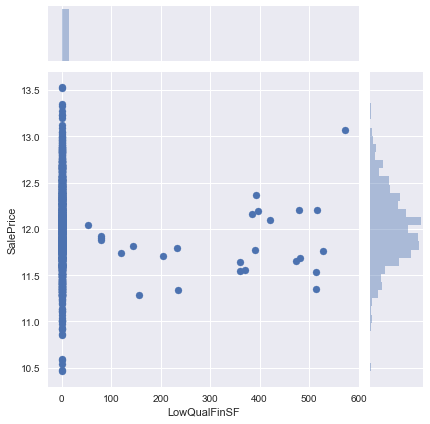

<Figure size 720x576 with 0 Axes>

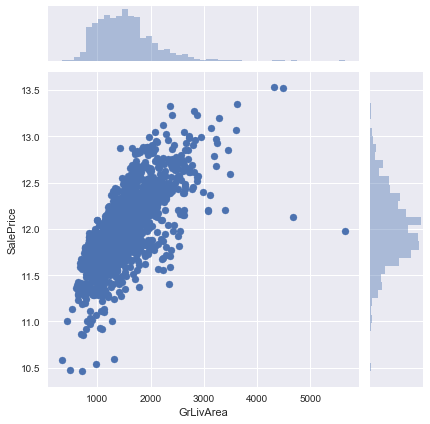

<Figure size 720x576 with 0 Axes>

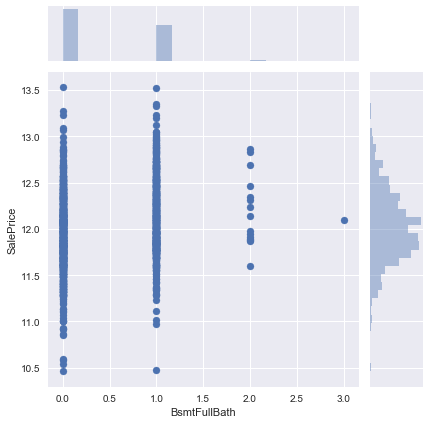

<Figure size 720x576 with 0 Axes>

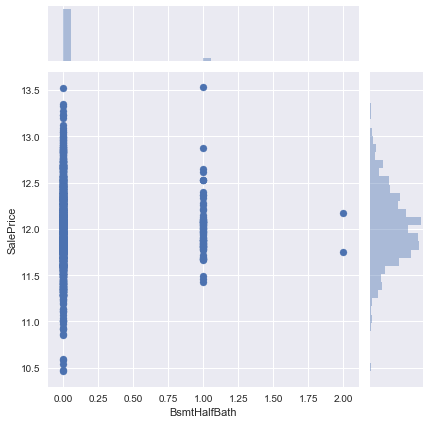

<Figure size 720x576 with 0 Axes>

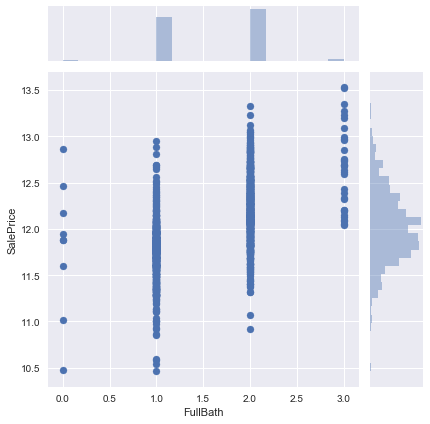

<Figure size 720x576 with 0 Axes>

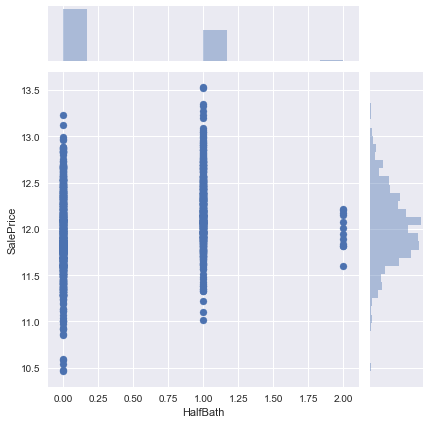

<Figure size 720x576 with 0 Axes>

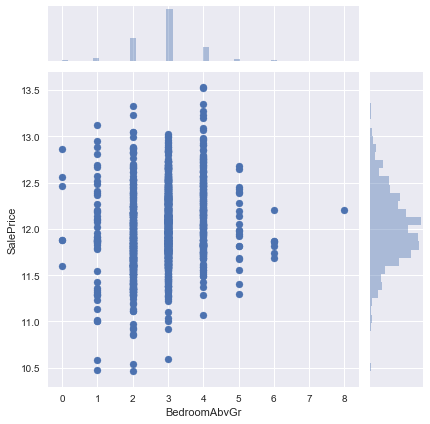

<Figure size 720x576 with 0 Axes>

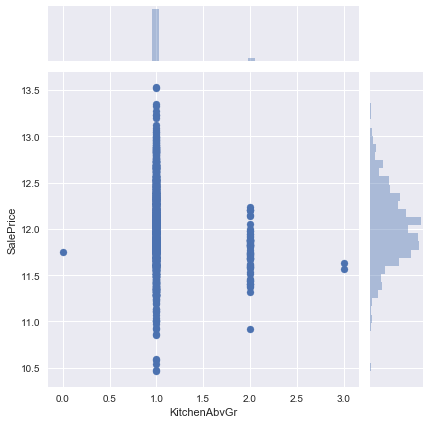

<Figure size 720x576 with 0 Axes>

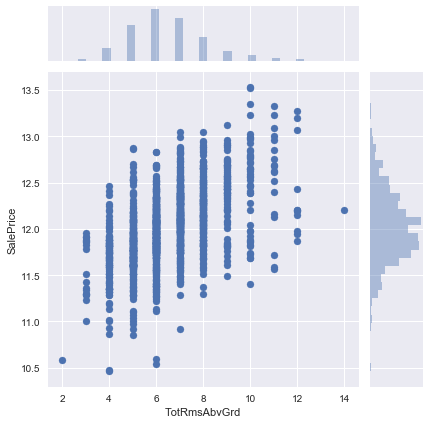

<Figure size 720x576 with 0 Axes>

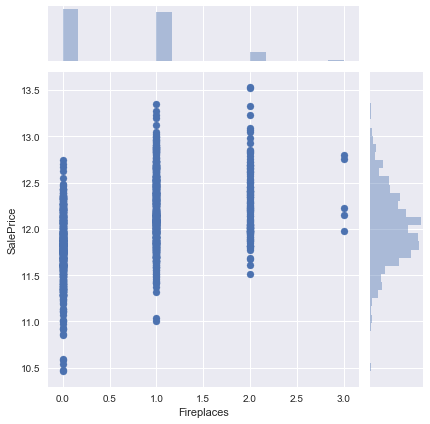

<Figure size 720x576 with 0 Axes>

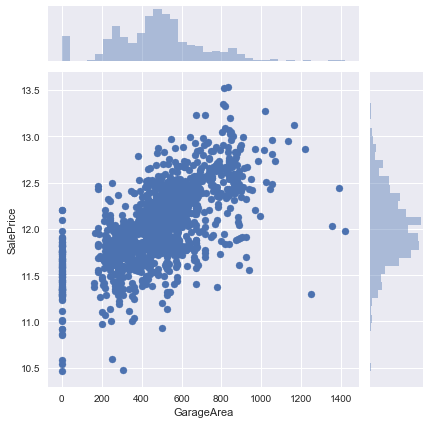

<Figure size 720x576 with 0 Axes>

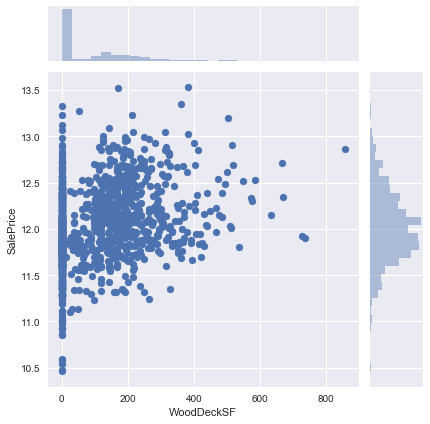

<Figure size 720x576 with 0 Axes>

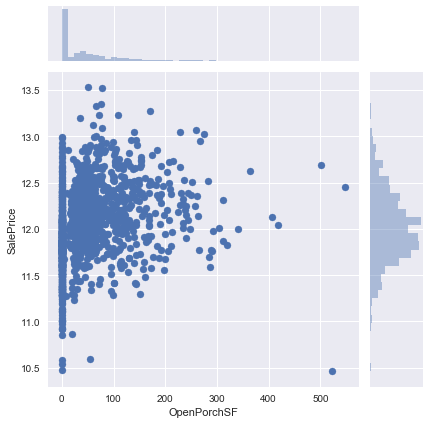

<Figure size 720x576 with 0 Axes>

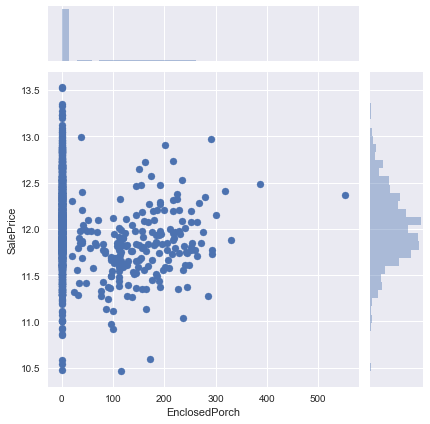

<Figure size 720x576 with 0 Axes>

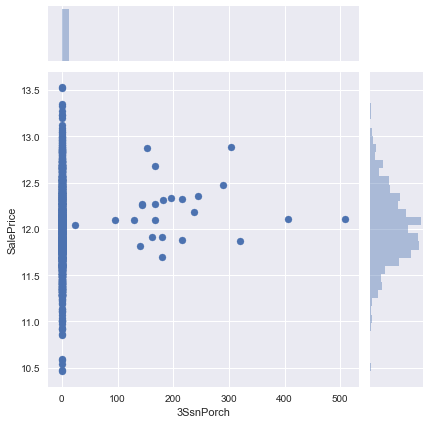

<Figure size 720x576 with 0 Axes>

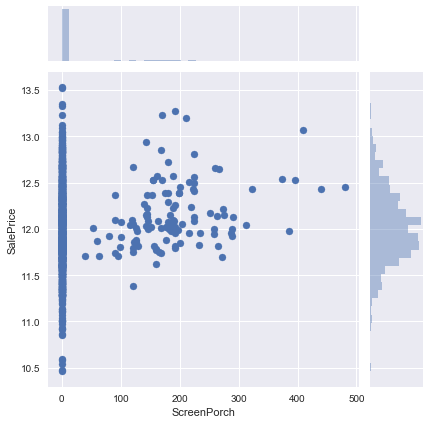

<Figure size 720x576 with 0 Axes>

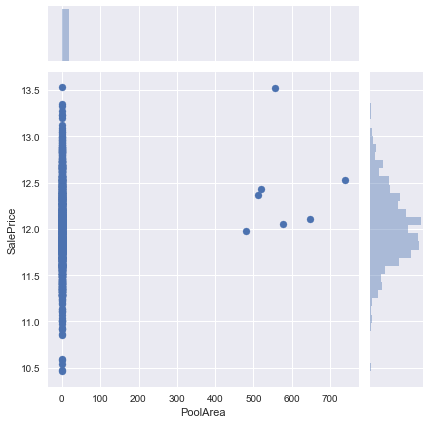

<Figure size 720x576 with 0 Axes>

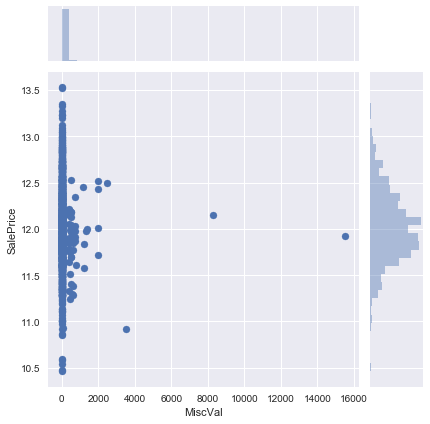

<Figure size 720x576 with 0 Axes>

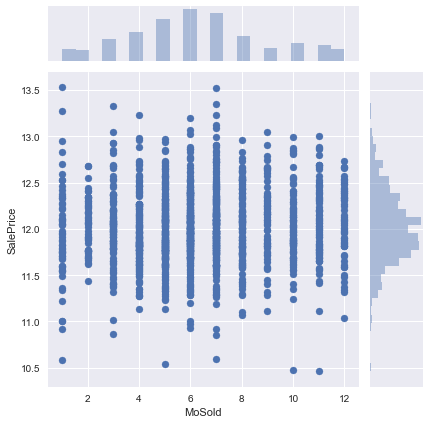

<Figure size 720x576 with 0 Axes>

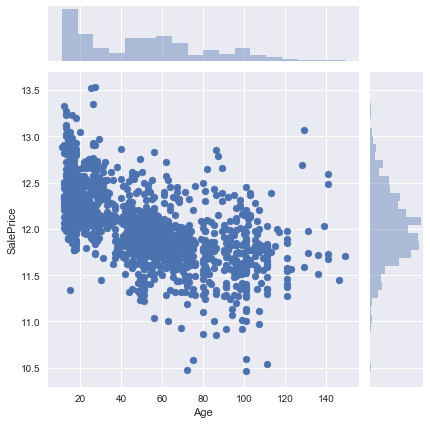

In [29]:
for cols in numerical_columns:
    plt.figure(figsize=[10,8])
    sns.jointplot(data[cols], data['SalePrice'])
    plt.show()

In [30]:
categorical_columns = ['MSZoning','Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType','HouseStyle','RoofStyle', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition']

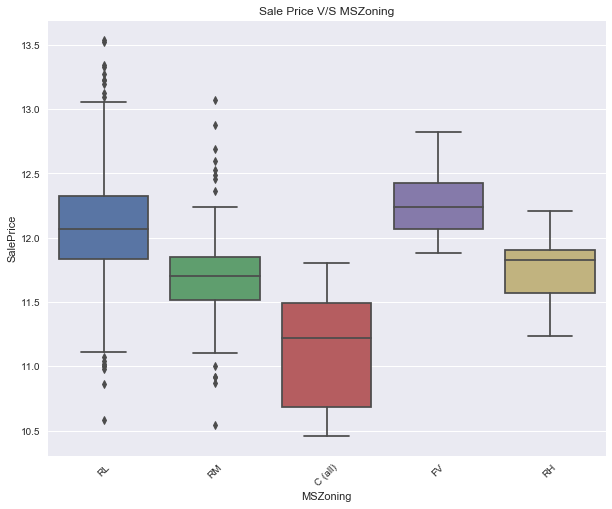

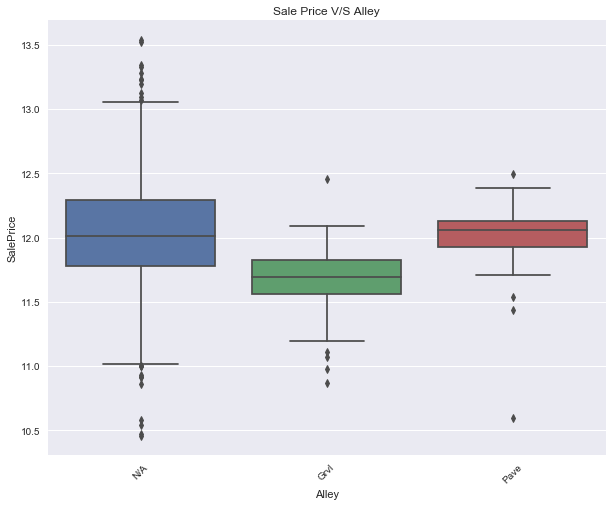

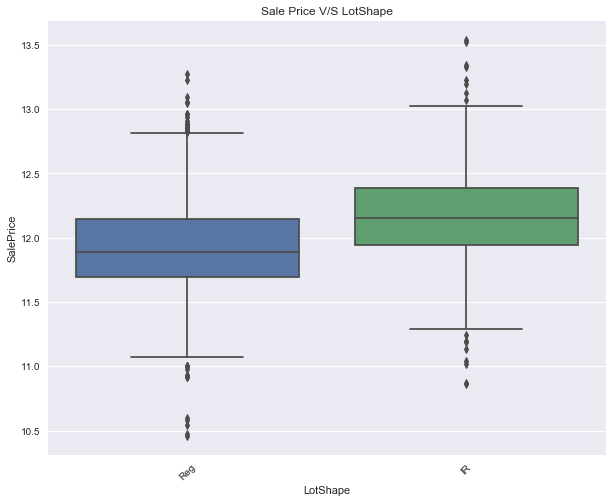

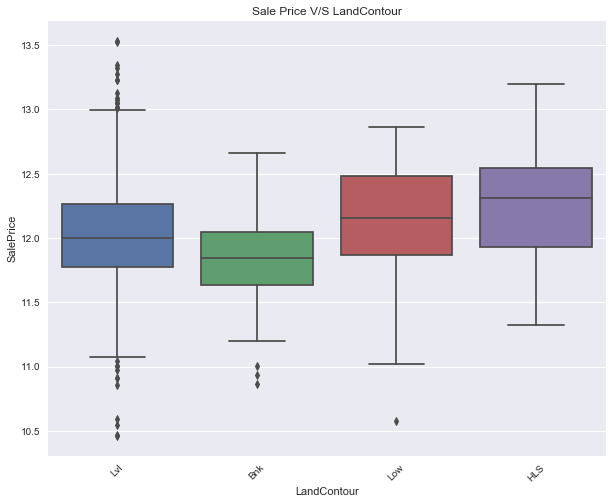

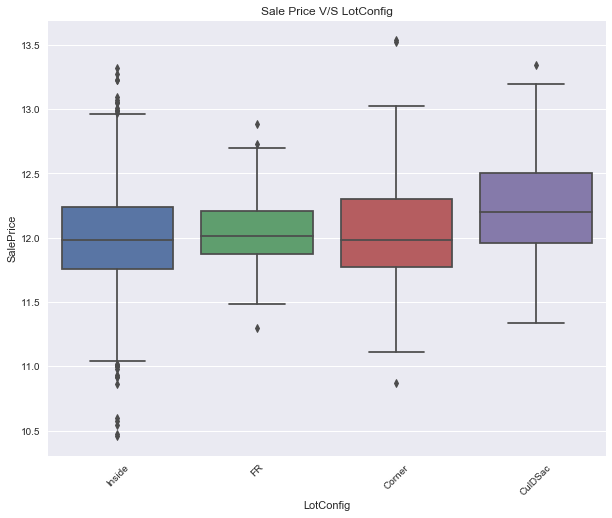

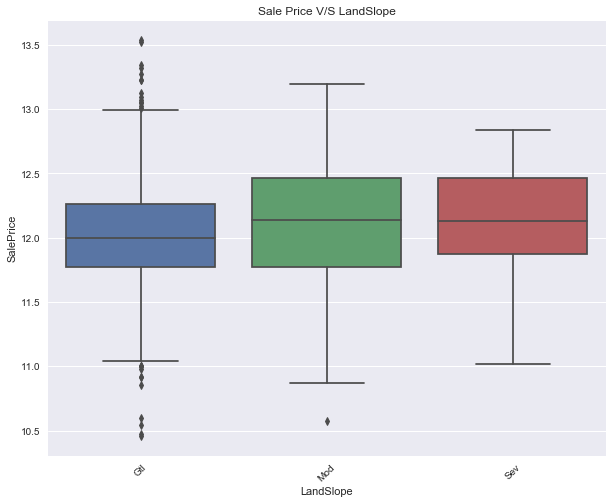

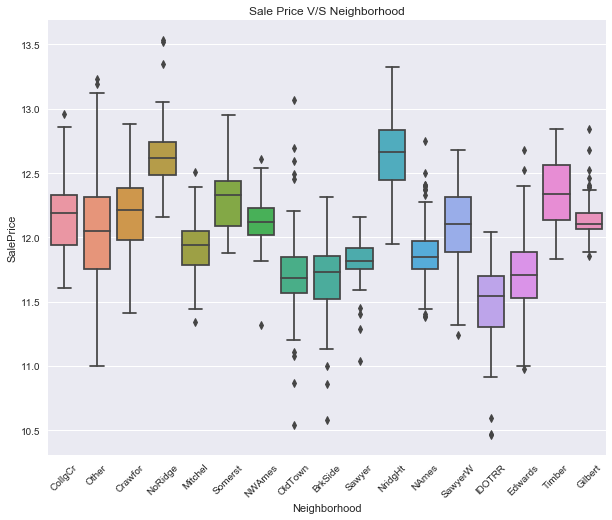

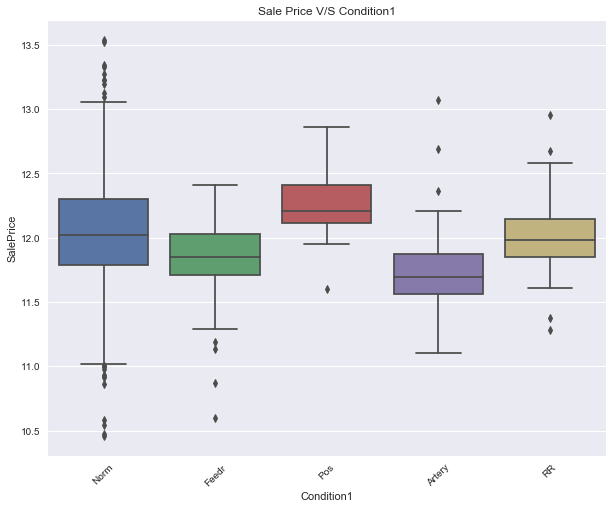

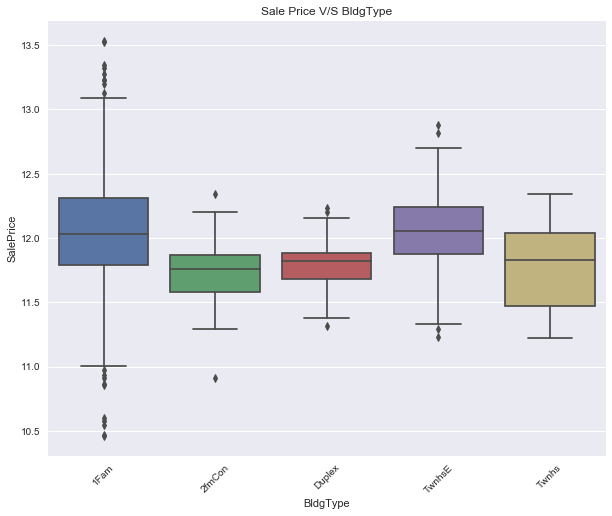

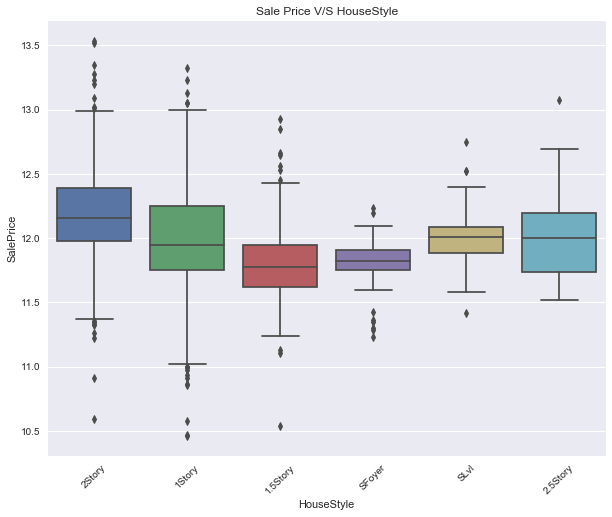

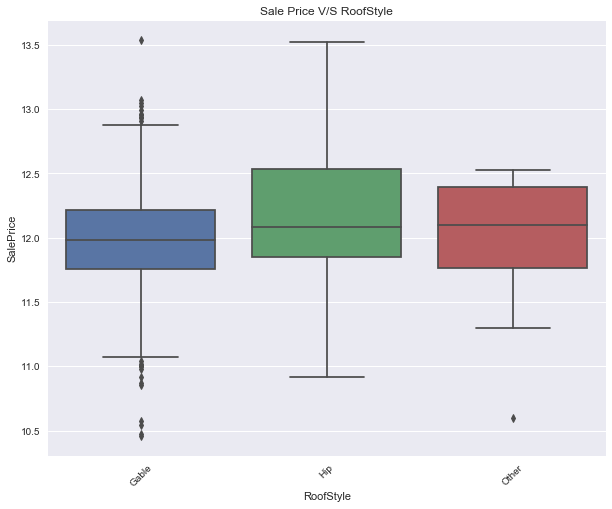

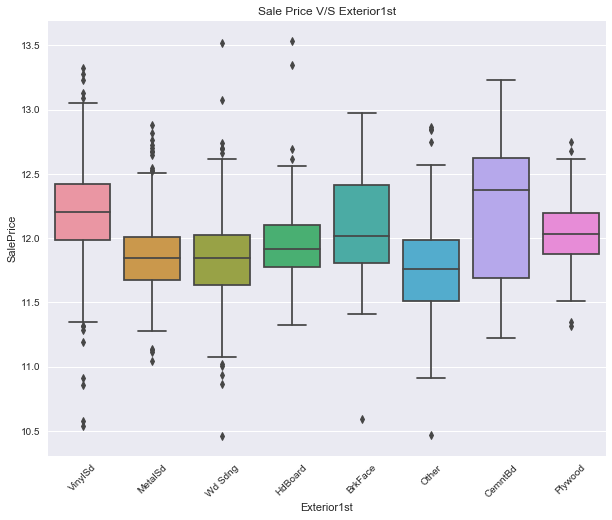

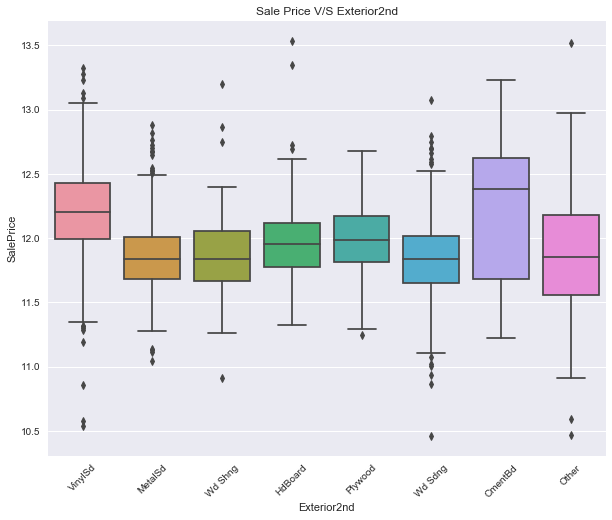

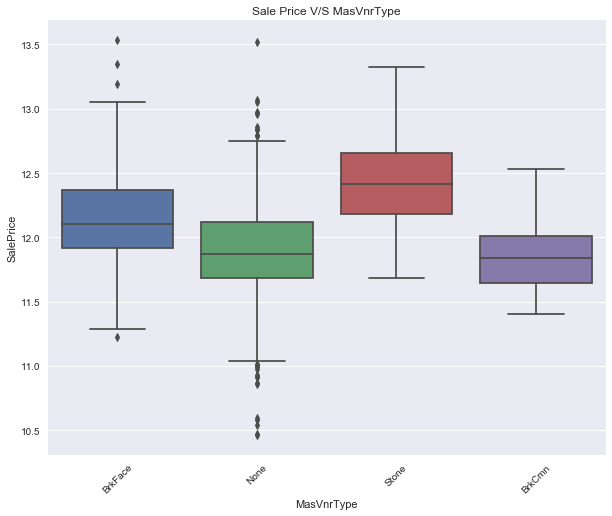

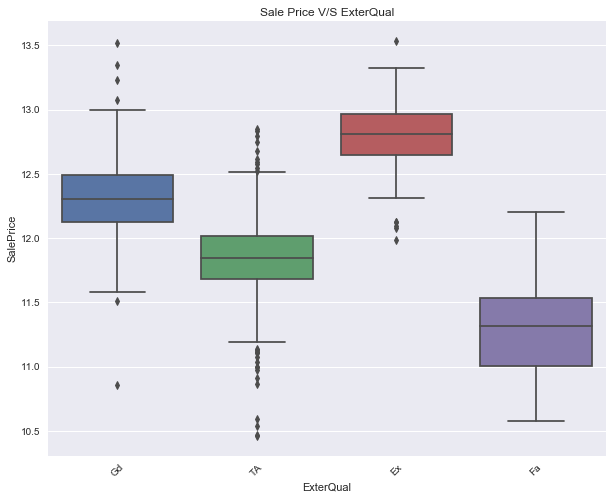

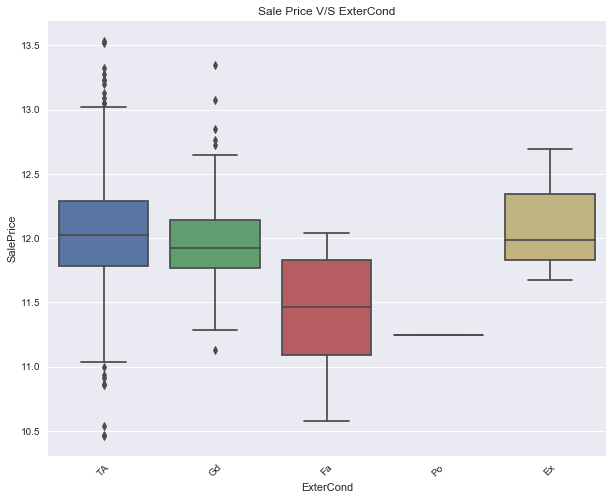

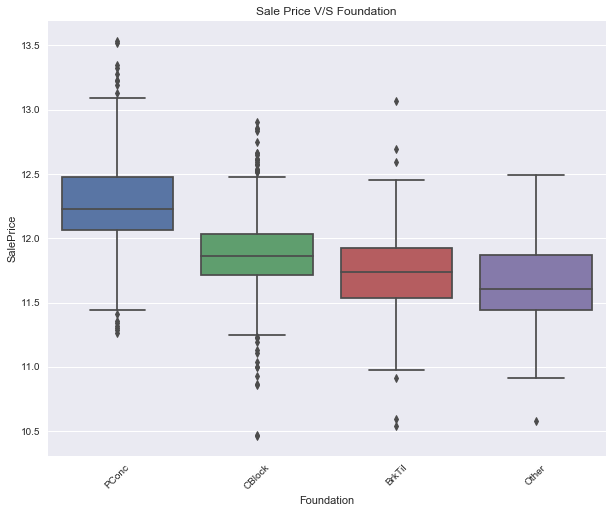

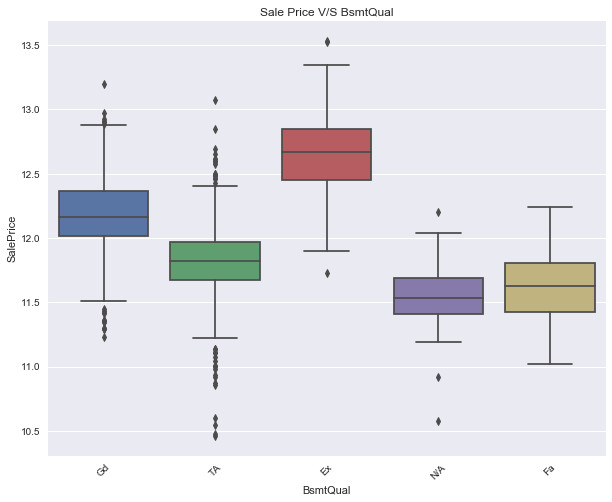

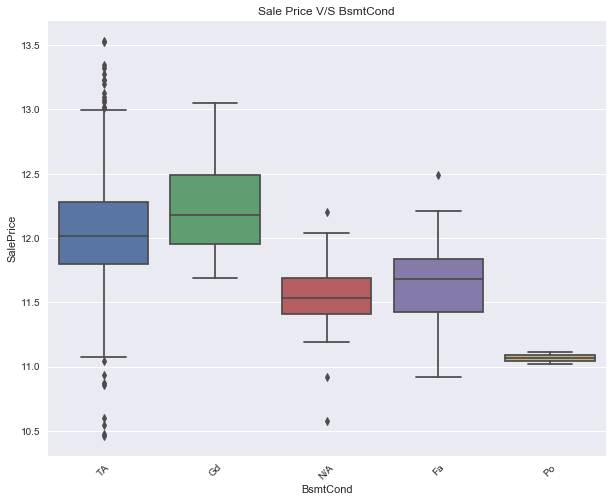

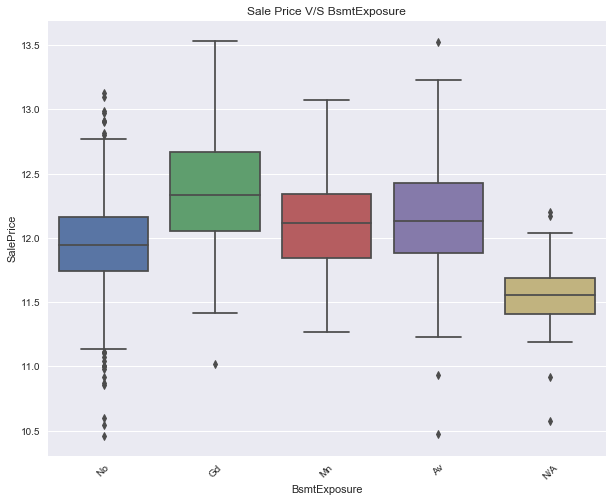

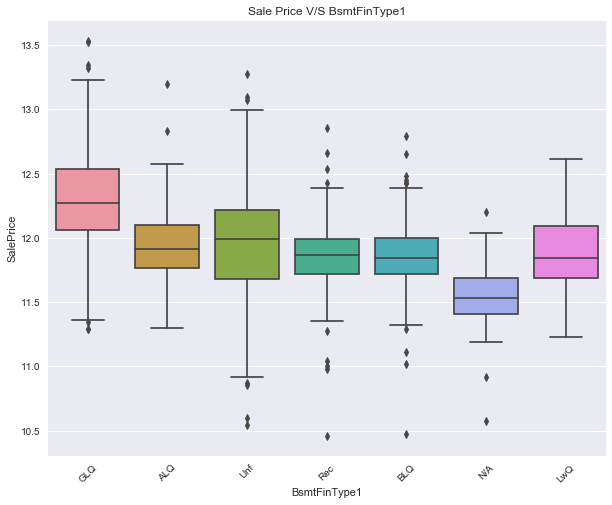

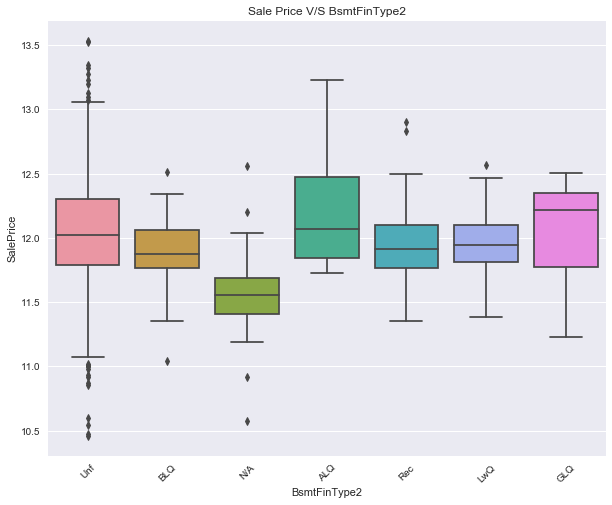

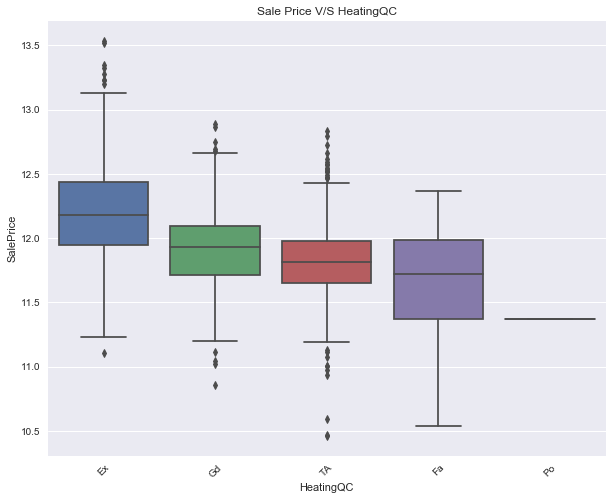

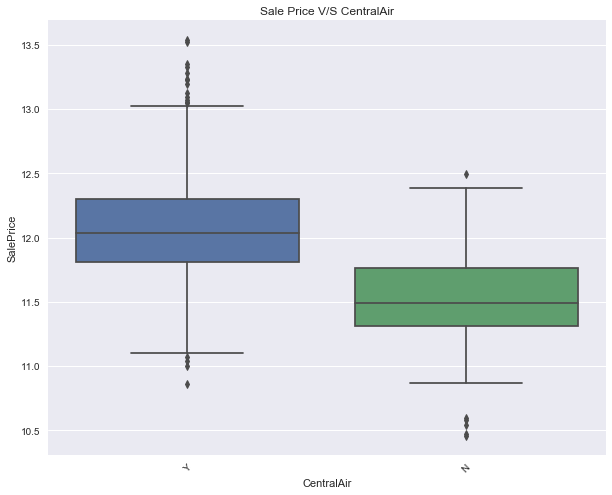

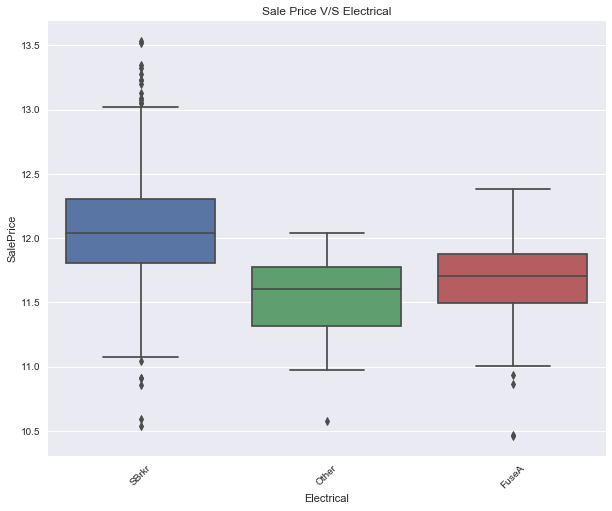

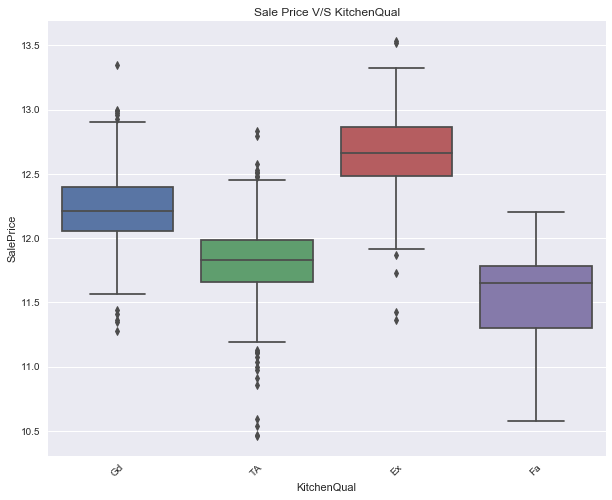

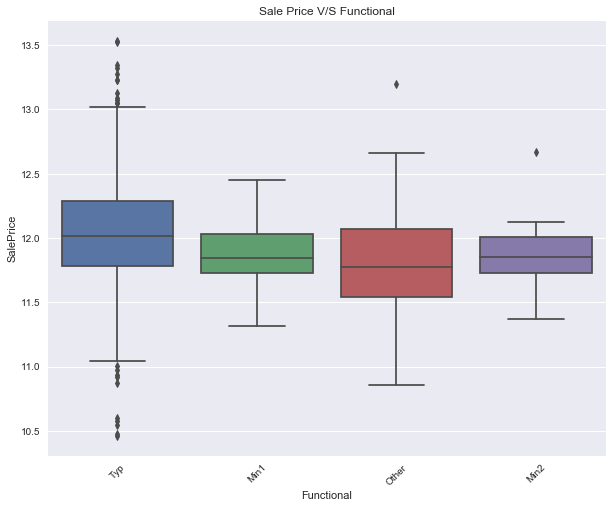

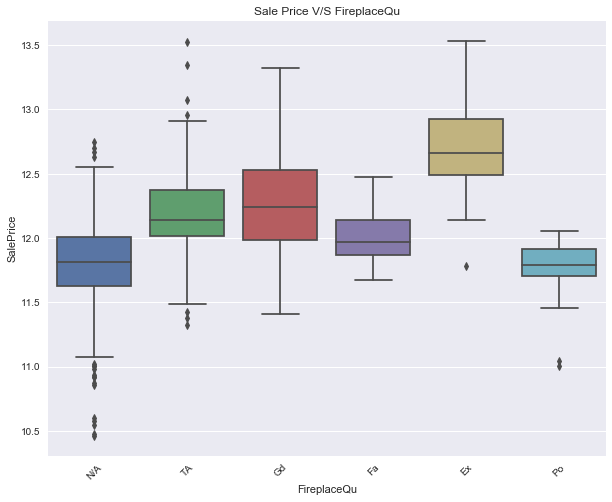

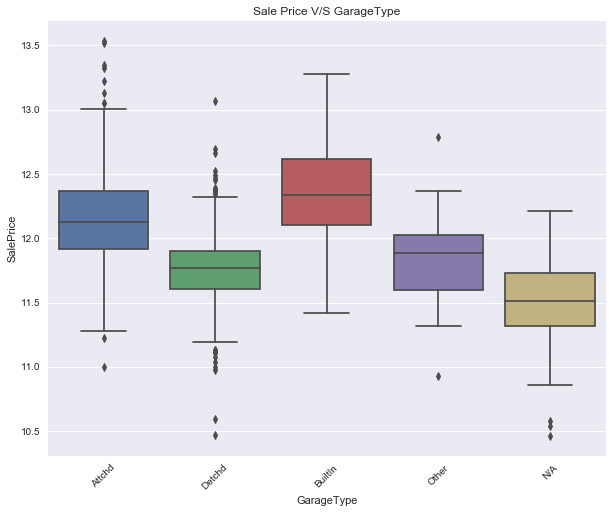

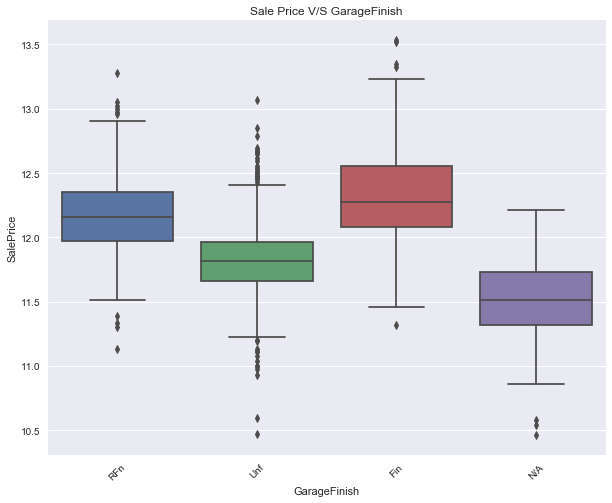

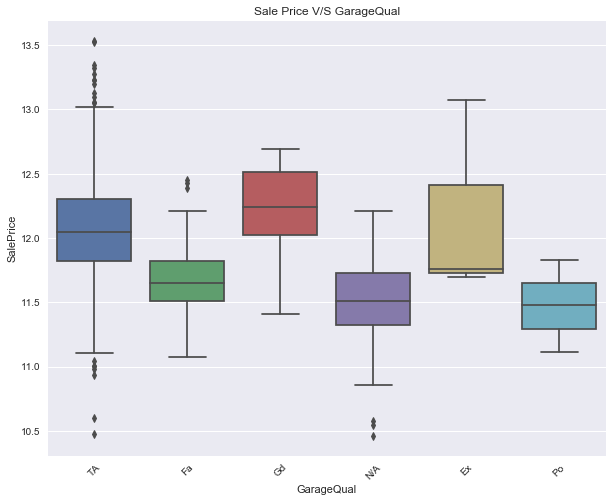

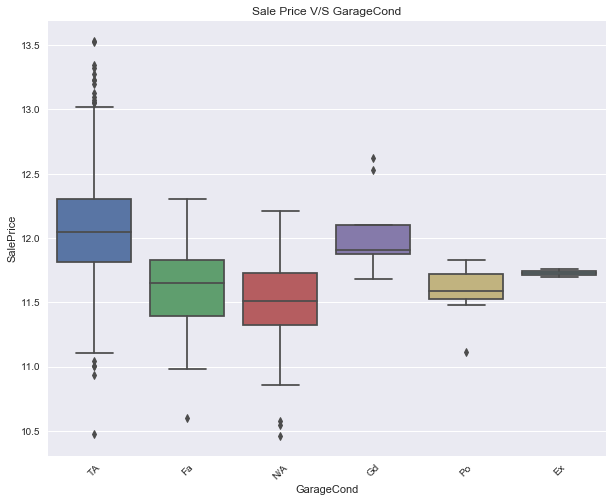

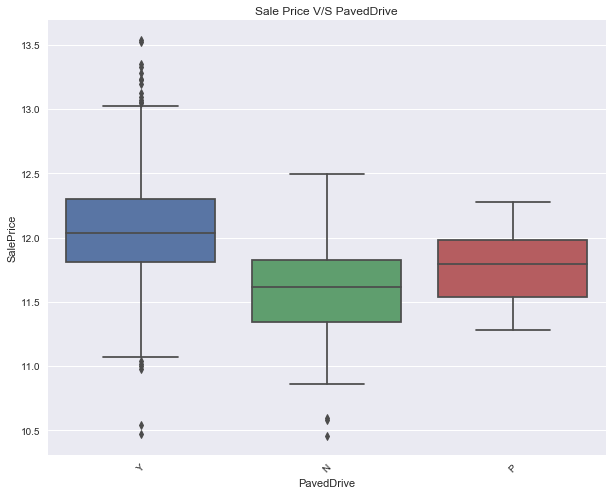

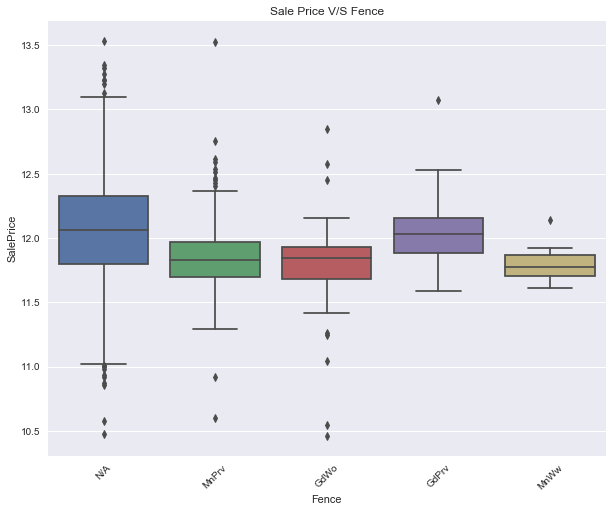

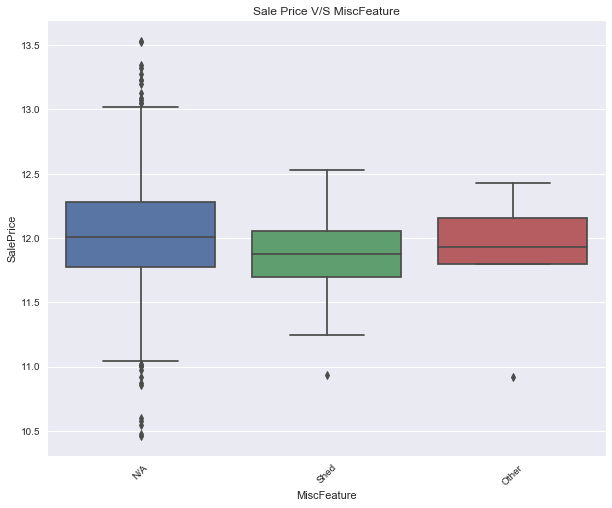

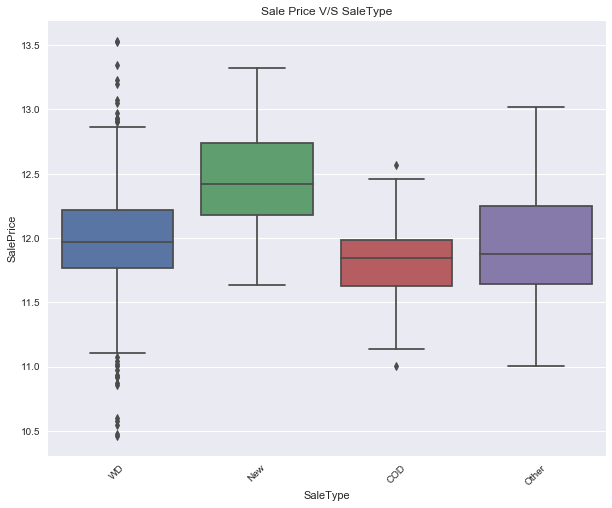

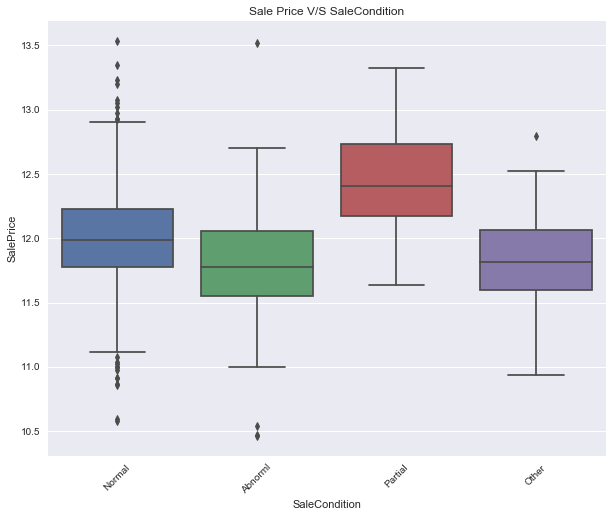

In [31]:
for col in categorical_columns:
    plt.figure(figsize=[10,8])
    plt.title("Sale Price V/S {}".format(col), size=12)
    sns.boxplot(data[col], data['SalePrice'])
    plt.xticks(rotation=45)
    plt.show()

## 4. Data Preparation

### i) Dummy variables and label encoding

In [32]:
encoding_columns = ['LotShape', 'CentralAir']

dummy_columns = ['MSZoning','Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType','HouseStyle','RoofStyle', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC', 'Electrical',
       'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition']

In [33]:
# Creating Dummies
dummy = pd.get_dummies(data[dummy_columns],drop_first=True)

In [34]:
# Label Encoding columns with 2 categories
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data[encoding_columns] = data[encoding_columns].apply(lambda col:encoder.fit_transform(col))

In [35]:
# merging dataframes and dropping dummy columns 
df = pd.concat([data.drop(dummy_columns,axis=1),dummy],axis=1)

In [36]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_N/A,Alley_Pave,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_N/A,BsmtQual_TA,BsmtCond_Gd,BsmtCond_N/A,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_N/A,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Other,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_N/A,GarageType_Other,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_N/A,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_N/A,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_N/A,MiscFeature_Other,MiscFeature_Shed,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,18,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
1,20,9600,6,8,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,45,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,60,11250,7,5,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,20,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,70,9550,7,5,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,106,0,0,1,0,1,0

In [37]:
df.shape

(1460, 179)

### ii) Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [39]:
X.shape

(1460, 178)

### iii) Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### iv) Feature Selection using RFE

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Selecting Top50 columns
lr = LinearRegression()
rfe = RFE(lr, 50)
rfe = rfe.fit(X_train_scaled, y_train)

In [42]:
pd.DataFrame(zip(X_train_scaled.columns, rfe.ranking_),columns=["Columns","Ranking"])

,Columns,Ranking
0,MSSubClass,93
1,LotArea,1
2,OverallQual,1
3,OverallCond,1
4,MasVnrArea,33
5,BsmtFinSF1,1
6,BsmtFinSF2,1
7,BsmtUnfSF,1
8,TotalBsmtSF,1
9,CentralAir,21


In [43]:
# Top 50 columns
col_50 = X_train_scaled.columns[rfe.support_]

In [44]:
col_50

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Condition1_Norm',
       'BldgType_Twnhs', 'Exterior1st_CemntBd', 'BsmtQual_N/A', 'BsmtCond_Po',
       'BsmtExposure_N/A', 'BsmtFinType2_N/A', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Other', 'GarageQual_Po', 'MiscFeature_Other',
       'SaleType_New', 'SaleType_Other', 'SaleCondition_Normal',
       'SaleCondition_Other', 'SaleCondition_Partial'],
      dtype='object')

## 5. Model Building

### i) Ridge

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]
param = {'alpha': alphas}

ridge_cv = GridSearchCV(estimator = Ridge(),
                       param_grid = param,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5,
                       return_train_score=True,
                       verbose=0)
ridge_cv.fit(X_train_scaled[col_50], y_train)
ridge_cv.best_params_

{'alpha': 1}

In [46]:
best_alpha = ridge_cv.best_params_['alpha']

In [47]:
# Training model with best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled[col_50], y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [48]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = ridge.predict(X_train_scaled[col_50])
y_pred_test = ridge.predict(X_test_scaled[col_50])

r2_train_ridge = r2_score(y_train, y_pred_train)
print("Train_R2_Score",round(r2_train_ridge,3))
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train_MSE",round(mse_train_ridge,3))

r2_test_ridge = r2_score(y_test, y_pred_test)
print("Test_R2_Score",round(r2_test_ridge,3))
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test_MS",round(mse_test_ridge,3))

Train_R2_Score 0.91
Train_MSE 0.015
Test_R2_Score 0.814
Test_MS 0.029


### ii) Lasso

In [49]:
from sklearn.linear_model import Lasso

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]
param = {'alpha': alphas}

lasso_cv = GridSearchCV(estimator = Lasso(),
                       param_grid = param,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5,
                       return_train_score=True,
                       verbose=0)
lasso_cv.fit(X_train_scaled[col_50], y_train)
lasso_cv.best_params_

{'alpha': 0.0001}

In [50]:
best_alpha = lasso_cv.best_params_['alpha']

In [51]:
# Training model with best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled[col_50], y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
# Model Evaluation
y_pred_train = lasso.predict(X_train_scaled[col_50])
y_pred_test = lasso.predict(X_test_scaled[col_50])

r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train_R2_Score",round(r2_train_lasso,3))
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train_MSE",round(mse_train_lasso,3))

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test_R2_Score",round(r2_test_lasso,3))
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test_MSE",round(mse_test_lasso,3))

Train_R2_Score 0.911
Train_MSE 0.014
Test_R2_Score 0.812
Test_MSE 0.029


## 6. Recommendations and Conclusion

In [53]:
# Ridge
frame = {
    "columns" : col_50,
     "coeff" : ridge.coef_
}
Features_Ridge = pd.DataFrame(frame)

Features_Ridge.sort_values(by='coeff', ascending=False, ignore_index=True, inplace=True)
Features_Ridge.head(10)

,columns,coeff
0,OverallQual,0.542753
1,1stFlrSF,0.369885
2,GrLivArea,0.368772
3,OverallCond,0.354978
4,MSZoning_FV,0.345387
5,MSZoning_RL,0.290303
6,LotArea,0.285580
7,2ndFlrSF,0.257714
8,TotalBsmtSF,0.237817
9,MSZoning_RH,0.236479


In [54]:
# Lasso
frame = {
    "columns" : col_50,
     "coeff" : lasso.coef_
}
Features_Lasso = pd.DataFrame(frame)

Features_Lasso.sort_values(by='coeff', ascending=False, ignore_index=True, inplace=True)
Features_Lasso.head(10)

,columns,coeff
0,GrLivArea,1.004249
1,OverallQual,0.564448
2,MSZoning_FV,0.425452
3,LotArea,0.402444
4,OverallCond,0.368208
5,MSZoning_RL,0.364997
6,TotalBsmtSF,0.334695
7,MSZoning_RH,0.321352
8,MSZoning_RM,0.301656
9,TotRmsAbvGrd,0.173601


The Top 10 features from Ridge Regression and Lasso Regression respectively are shown above which can be recommended to the concerned team at Surprise Housing. These features play high role in governing the target variable i.e. Sale Price and hence the team should use these features to decide on Sale Prices in order to increase the profits. 

#### Top Features List(not in any order):

 - Lot Area
 - Overall Quality
 - MS Zoning
 - Overall Condition
 - Ground living area
 - Total Basement area
 - 1st floor square feet
 - 2nd floor square feet
 - Total rooms above grade